In [1]:
# import libaries
import pandas as pd
from IPython.display import display
import sys
import os

if not os.path.isdir("mmm"):
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)

import mmm

In [2]:
# load daily data
file_name = "Brand Searches Interpolate - Sheet1.csv"
daily = pd.read_csv('../data/'+file_name)
daily.head()

,Date,Brand Searches
0,2018-06-01,"4,394"
1,2018-06-02,"6,215"
2,2018-06-03,"5,581"
3,2018-06-04,"5,040"
4,2018-06-05,"4,180"


In [3]:
# remove commas and cast to right types
daily['Brand Searches'] = pd.to_numeric(daily['Brand Searches'].apply(lambda x: x.replace(',','')))
daily['Date'] = pd.to_datetime(daily['Date'], format="%Y-%m-%d")
daily.head()

,Date,Brand Searches
0,2018-06-01,4394
1,2018-06-02,6215
2,2018-06-03,5581
3,2018-06-04,5040
4,2018-06-05,4180


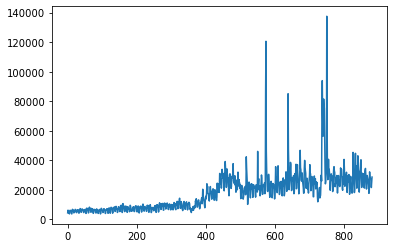

In [4]:
# plot daily data
daily['Brand Searches'].plot();

,year_week,Brand Searches
0,2018-22,16190
1,2018-23,36777
2,2018-24,37994
3,2018-25,38927
4,2018-26,39377


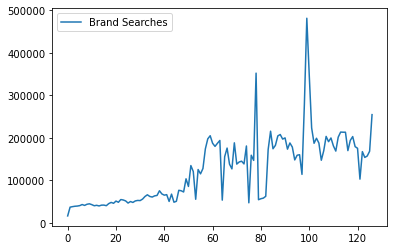

In [5]:
from mmm.clean import group_weekly

# group weekly data
weekly = group_weekly(daily, date_col='Date')
weekly.plot();
weekly.head()

,year_month,Brand Searches
0,2018-10,211952
1,2018-11,224406
2,2018-12,217625
3,2018-6,162742
4,2018-7,184412


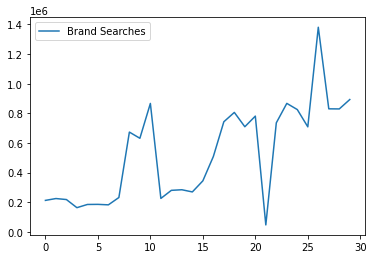

In [6]:
from mmm.clean import group_monthly

# group monthly data
monthly = group_monthly(daily, date_col='Date')
monthly.plot();
monthly.head()

,date,Brand Searches
0,2018-05-28,2312.857143
1,2018-05-29,2733.000000
2,2018-05-30,3153.142857
3,2018-05-31,3573.285714
4,2018-06-01,3993.428571


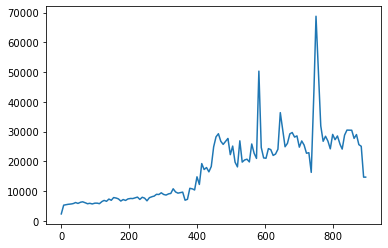

In [7]:
from mmm.clean import interpolate_weekly_data

# Interpolate weekly data
dw = interpolate_weekly_data(weekly)
dw['Brand Searches'].plot();
dw.head()

,date,Brand Searches
0,2018-06-01,5424.733333
1,2018-06-02,5442.201362
2,2018-06-03,5459.669391
3,2018-06-04,5477.137419
4,2018-06-05,5494.605448


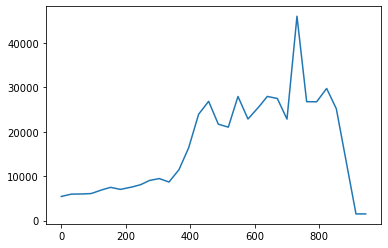

In [8]:
from mmm.clean import interpolate_monthly_data

# Interpolate monthly data
dm = interpolate_monthly_data(monthly)
dm['Brand Searches'].plot();
dm.head()

,Date,Brand Searches_x,date_x,Brand Searches_y,date_y,Brand Searches
0,2018-06-01,4394,2018-06-01,3993.428571,2018-06-01,5424.733333
1,2018-06-02,6215,2018-06-02,4413.571429,2018-06-02,5442.201362
2,2018-06-03,5581,2018-06-03,4833.714286,2018-06-03,5459.669391
3,2018-06-04,5040,2018-06-04,5253.857143,2018-06-04,5477.137419
4,2018-06-05,4180,2018-06-05,5278.693878,2018-06-05,5494.605448


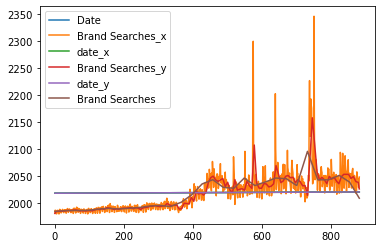

In [11]:
df = pd.merge(daily, dw, how="left", left_on='Date', right_on='date')
df = pd.merge(df, dm, how="left", left_on='Date', right_on='date')
df.drop(['date_x', 'date_y'], axis=1, inplace=True)
df.set_index('Date', drop=True)
df.columns = ['Date']
df.plot()
df.head()